Adrian Gruszczynski / Yann Salimi

In [2]:
import torch
from torch import optim, nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from collections import OrderedDict
import matplotlib.pyplot as plt


class CNN:
    def __init__(self, n_inputs, n_hidden, n_out):
        self.model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(n_inputs, n_hidden[0])),
            ('ReLU1', nn.ReLU()),
            ('fc2', nn.Linear(n_hidden[0], n_hidden[1])),
            ('ReLU2', nn.ReLU()),
            ('fc3', nn.Linear(n_hidden[1], n_hidden[2])),
            ('ReLU3', nn.ReLU()),
            ('output', nn.Linear(n_hidden[2], n_out)),
            ('log_softmax', nn.LogSoftmax(dim=1))]))

    def train(self, epochs, optimizer, loss_function):
        ax1, ax2 = init_plot()
        for i in range(epochs):
            training_loss = 0
            self.model.train()
            for images, labels in train_loader:
                images = images.view(images.shape[0], -1)
                optimizer.zero_grad()
                out = self.model(images)
                loss = loss_function(out, labels)
                loss.backward()
                optimizer.step()
                training_loss += loss.item()
            correct = 0
            total = 0
            self.model.eval()
            for images, labels in test_loader:
                images = images.view(images.shape[0], -1)
                outputs = self.model(images)
                predictions = torch.argmax(outputs, dim=1)
                correct += torch.sum(torch.eq(labels, predictions))
                total += labels.size(0)
            loss = (training_loss / len(train_loader))
            accuracy = (100 * correct / total)
            ax1.scatter(i, loss, c='b')
            ax2.scatter(i, accuracy, c='y')
        print('Val accuracy: %.2f%%' % accuracy)
        plt.show()


def init_plot():
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('No. iterations')
    ax2.set_ylabel('Val accuracy')
    ax2.set_xlabel('No. iterations')

    return ax1, ax2

In [3]:
batch_size = 64

train_dataset = datasets.FashionMNIST(root='./fashionMNIST', train=True,
                                      transform=transforms.ToTensor(),
                                      download=True)

test_dataset = datasets.FashionMNIST(root='./fashionMNIST', train=False,
                                     transform=transforms.ToTensor(),
                                     download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

Val accuracy: 86.00%


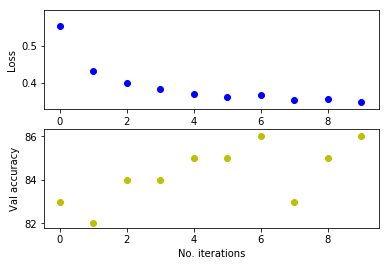

In [7]:
_n_input = 784
_n_hidden = [256, 128, 64]
_n_out = 10
_epochs = 10
_alpha = .01

cnn = CNN(_n_input, _n_hidden, _n_out)
_optimizer = optim.Adam(cnn.model.parameters(), lr=_alpha)
_loss_function = nn.NLLLoss()
cnn.train(_epochs, _optimizer, _loss_function)

#### 86% Accuracy with .01 learning rate, neagtive log likelihood loss function and Adam optimizer

Val accuracy: 86.00%


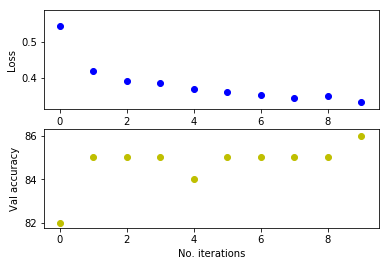

In [8]:
_n_out = 10
_epochs = 10
_alpha = .01

cnn = CNN(_n_input, _n_hidden, _n_out)
_optimizer = optim.Adam(cnn.model.parameters(), lr=_alpha)
_loss_function = nn.CrossEntropyLoss()
cnn.train(_epochs, _optimizer, _loss_function)

#### 86% Accuracy with .01 learning rate, cross entropy loss function and Adam optimizer

Val accuracy: 88.00%


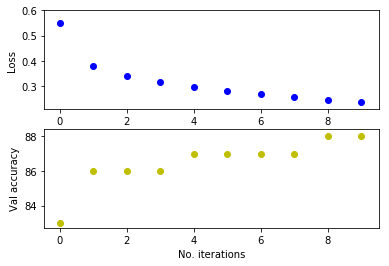

In [9]:
_epochs = 10
_alpha = .001

cnn = CNN(_n_input, _n_hidden, _n_out)
_optimizer = optim.Adam(cnn.model.parameters(), lr=_alpha)
_loss_function = nn.CrossEntropyLoss()
cnn.train(_epochs, _optimizer, _loss_function)

#### 88% Accuracy with .001 learning rate, neagtive log likelihood loss function and Adam optimizer

Val accuracy: 86.00%


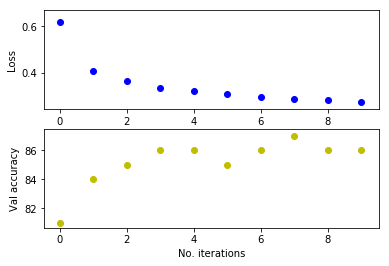

In [10]:
cnn = CNN(_n_input, _n_hidden, _n_out)
_optimizer = optim.Adadelta(cnn.model.parameters())
_criterion = nn.CrossEntropyLoss()
cnn.train(_epochs, _optimizer, _criterion)

#### 86% Accuracy with cross entropy loss function and Adadelta

# Excercise 2. PyTorch II

## ResNet

In [13]:
import torch
from torchvision.transforms import Compose, ToTensor, Resize
import torchvision.datasets as datasets
from torchvision.models.resnet import ResNet, BasicBlock
from torch import optim, nn


class RN(ResNet):
    def __init__(self):
        super(RN, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64,
                                     kernel_size=(7, 7),
                                     stride=(2, 2),
                                     padding=(3, 3), bias=False)

    def forward(self, x):
        return torch.softmax(
            super(RN, self).forward(x), dim=-1)


def train(epochs, optimizer, loss_function, model):
    for i in range(epochs):
        training_loss = 0
        model.train()
        for i, data in enumerate(train_loader):
            if i == 0:
                X, y = data[0], data[1]
                model.zero_grad()
                out = model(X)
                loss = loss_function(out, y)
                loss.backward()
                optimizer.step()
                training_loss += loss.item()
            else:
                break
        correct = 0
        total = 0
        model.eval()
        for images, labels in test_loader:
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += torch.sum(torch.eq(labels, predictions))
            total += labels.size(0)
        loss = (training_loss / len(train_loader))
        accuracy = (100 * correct / total)
    print('Loss: %.6f%%' % loss)
    print('Val accuracy: %.2f%%' % accuracy)

In [14]:
batch_size = 64

train_dataset = datasets.FashionMNIST(root='./MNIST', train=True,
                                      transform=Compose([Resize((224, 224)), ToTensor()]),
                                      download=True)

test_dataset = datasets.FashionMNIST(root='./MNIST', train=False,
                                     transform=Compose([Resize((224, 224)), ToTensor()]),
                                     download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

_model = RN()
_epochs = 1
_optimizer = optim.Adadelta(_model.parameters())
_loss_function = nn.CrossEntropyLoss()
train(_epochs, _optimizer, _loss_function, _model)

KeyboardInterrupt: 